In [9]:
import numpy as np
from PIL import Image, ImageDraw
import random
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [10]:
# Load MNIST dataset
def load_mnist():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.reshape(x_train.shape[0], -1).astype('float32') / 255
    x_test = x_test.reshape(x_test.shape[0], -1).astype('float32') / 255
    return x_train, y_train, x_test, y_test

In [11]:
mnist_data = load_mnist()

In [12]:
def plot_dataset_samples(images, labels, dataset_name, num_samples=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.suptitle(f"{dataset_name} Dataset Samples")
    plt.show()

def visualize_datasets(mnist_data):
    (x_train_mnist, y_train_mnist, _, _) = mnist_data

    # Visualize MNIST samples
    mnist_indices = np.random.choice(len(x_train_mnist), 5, replace=False)
    plot_dataset_samples(x_train_mnist[mnist_indices], y_train_mnist[mnist_indices], "MNIST")

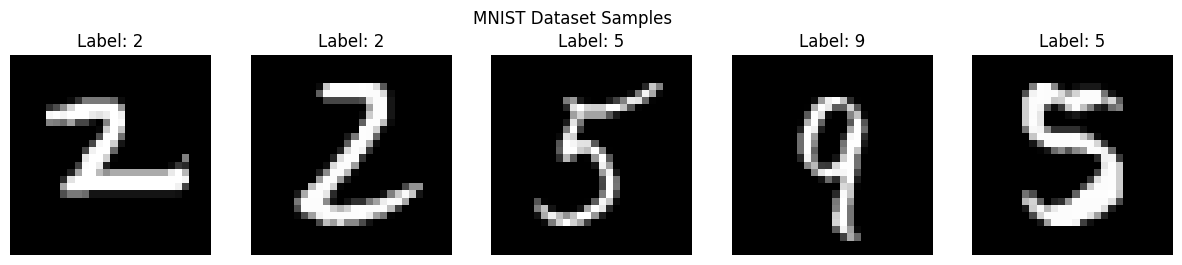

In [13]:
# Visualize datasets
visualize_datasets(mnist_data)

In [14]:
# CNN classification
def cnn_classification(num_classes):
    model = models.Sequential([
        layers.Input(shape=(28, 28, 1)),  # Add this line
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

def train(model, x_train, y_train, x_test, y_test):
    x_train = x_train.reshape(-1, 28, 28, 1)
    x_test = x_test.reshape(-1, 28, 28, 1)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=5, validation_split=0.2, batch_size=64)
    
    _, accuracy = model.evaluate(x_test, y_test)
    return accuracy

In [15]:
x_train, y_train, x_test, y_test = mnist_data
mnist_model = cnn_classification(num_classes=10)
print("MNIST CNN Accuracy:", train(mnist_model, x_train, y_train, x_test, y_test))

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8396 - loss: 0.4988 - val_accuracy: 0.9822 - val_loss: 0.0587
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9826 - loss: 0.0573 - val_accuracy: 0.9856 - val_loss: 0.0492
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9869 - loss: 0.0406 - val_accuracy: 0.9869 - val_loss: 0.0415
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9908 - loss: 0.0278 - val_accuracy: 0.9904 - val_loss: 0.0348
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.9901 - val_loss: 0.0368
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9875 - loss: 0.0423
MNIST CNN Accuracy: 0.9907000064849854


In [16]:
def plot_classification_results(images, true_labels, predicted_labels, dataset_name, num_samples=5):
    plt.figure(figsize=(15, 3))
    indices = np.random.choice(len(images), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        color = 'green' if true_labels[idx] == predicted_labels[idx] else 'red'
        plt.title(f"True: {true_labels[idx]}\nPred: {predicted_labels[idx]}", color=color)
        plt.axis('off')
    plt.show()

def visualize_classification_results(mnist_model, mnist_data):
    (_, _, x_test_mnist, y_test_mnist) = mnist_data

    # MNIST predictions
    y_pred_mnist = mnist_model.predict(x_test_mnist.reshape(-1, 28, 28, 1)).argmax(axis=1)
    plot_classification_results(x_test_mnist, y_test_mnist, y_pred_mnist, "MNIST")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


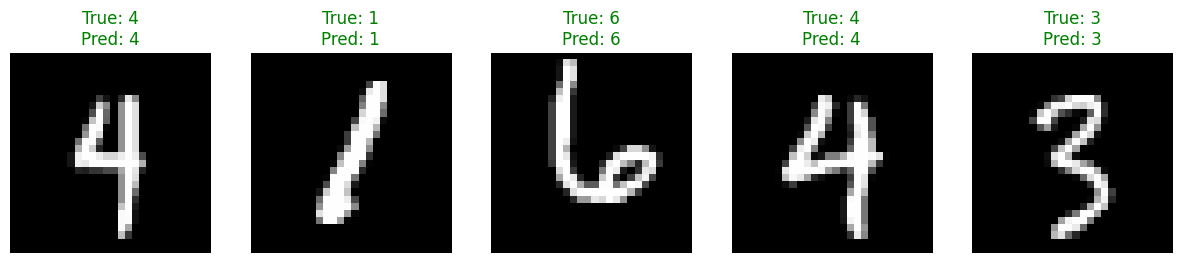

In [18]:
visualize_classification_results(mnist_model, mnist_data)